### First, report what type of algorithm you need to use and why? [1 Mark]

For this specific problem, we should use a regression model. Regression models are good at predicting continuous values like the price for the policy here. We can use a regression algorithm to find out if we are being charged a fair amount for the 100 new employees. Not only can we use the algorithm to get a total charge value, but we could also find out how each feature affects the price. This can help us in the future in the rare case two candidates are very evenly matched for the new role.

There are many different regression algorithms we can use. We need to be mindful and make sure that our model is not overfitting. Overfitting in this situation would make it so that the model is good at predicting the cost for our 1238 employees but does badly when trying to predict the cost for our new 100 employees. We want to avoid this, so we do not waste time and money predicting what we already know.

We can start with LinearRegression model from sklearn. Linear Regression models are simple as it assumes a linear relationship between the customer features and the cost. There is an issue that arises though, as not every dataset can be described with a linear expression so then it underfits. Underfitting can be just as bad as overfitting as it cannot capture the relevant relationships between the features and output. For this we can modify the data to be in second order norm and see how it performs afterwards. Adding more complexity to the hypothesis increases the regression model’s ability to fit the data but might risk overfitting.

We can use other regression models like the RandomForestRegressor. This is an ensemble method, so it takes the prediction of multiple decision trees. This is good because taking an average of multiple predictions can help combat overfitting and underfitting which we want to avoid.

### Use all the techniques of pre-processing, cleaning, and normalisation to prepare your data. Report each with justification why you want to use. [3 Marks]

In [1]:
# Reading the data in and exploring it
import pandas as pd
df_data = pd.read_csv("Train-2.csv")
df_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1233,58,male,23.300,0,no,southwest,11345.51900
1234,45,female,27.830,2,no,southeast,8515.75870
1235,26,male,31.065,0,no,northwest,2699.56835
1236,63,female,21.660,0,no,northeast,14449.85440


We can see we have many features with categorical data such as smoker, sex and region. To fit these features into our regression models we need to make sure they are numeric as regression models only take numeric values. There are many ways we can do this. We can use built in functions in sklearn such as OneHotEncoding which deals with features with two values or LabelEncoder for when there are multiple values.

Whichever method we choose, we need to make sure our categorical values are numeric. I've chosen to do this manually as I feel more in control in how my categorical features are presented.

In [2]:
# Checking all unique values region feature has
df_data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [3]:
# Changing region to be numeric
df_data['region'] = df_data['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

# Changing sex to be binary
df_data['sex'] = df_data['sex'].map({'male': 0, 'female': 1})

# Changing smoker to be binary
df_data['smoker'] = df_data['smoker'].map({'no': 0, 'yes': 1})

df_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1233,58,0,23.300,0,0,0,11345.51900
1234,45,1,27.830,2,0,1,8515.75870
1235,26,0,31.065,0,0,2,2699.56835
1236,63,1,21.660,0,0,3,14449.85440


All the categorical values are now numeric.

We should preform normalization on our features. Normalization will bring all the features to a uniform scale which makes sure that no feature will dominate the model due to sheer size. This should improve performance and also make the training and testing fair. Any regression algorithms that use Gradient Descent will improve performance as the convergence will be found quicker. I will be normalizing all the features that are not already in range [-1, 1] to be in range [-1, 1]

We can use sklearns MinMaxScaler() function to achieve this

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (-1, 1)).set_output(transform="pandas")

# I don't want to scale the charges feature as that is what we are trying to predict
charges_column = df_data['charges']
df_data_scaled = df_data.drop('charges', axis = 1)

# Normalizing data to range [-1, 1]
df_data_scaled = scaler.fit_transform(df_data)

# Adding back charges column
df_data_scaled['charges'] = charges_column

df_data_scaled

,age,sex,bmi,children,smoker,region,charges
0,-0.956522,1.0,-0.347897,-1.0,1.0,-1.000000,16884.92400
1,-1.000000,-1.0,-0.027307,-0.6,-1.0,-0.333333,1725.55230
2,-0.565217,-1.0,-0.069361,0.2,-1.0,-0.333333,4449.46200
3,-0.347826,-1.0,-0.631622,-1.0,-1.0,0.333333,21984.47061
4,-0.391304,-1.0,-0.294375,-1.0,-1.0,0.333333,3866.85520
...,...,...,...,...,...,...,...
1233,0.739130,-1.0,-0.599126,-1.0,-1.0,-1.000000,11345.51900
1234,0.173913,1.0,-0.351720,-0.2,-1.0,-0.333333,8515.75870
1235,-0.652174,-1.0,-0.175041,-1.0,-1.0,0.333333,2699.56835
1236,0.956522,1.0,-0.688695,-1.0,-1.0,1.000000,14449.85440


All the features are now normalized to the range  [-1, 1]. This will improve performance for our models and if they are using Gradient descent then they will find convergence quicker.

One last thing we can do to prepare out data is feature subset selection. I want to only get the most relevant features for our models. This means our models will have to fit only relevant features which will improve performance and make it more generalised to new data. For Linear regression it will be very helpful as we will be making the weights of the features 0 which will improve performance as the size of the dimension will be lower. 

I've decided to use a wrapper method which takes in a model and does feature subset selection with it. I have chosen to use RFECV from sklearn. RFECV implements Recursive feature elimination with cross-validation to select features. It works by recursively going through all the possible features and eliminating the least impactful ones. It uses Cross Validation to get an average evaluation of the features which will improve generalisation to new data. 

In [5]:
# Separating independant and depedent columns to fit our wrapper
y = df_data_scaled['charges']
X = df_data_scaled.drop('charges', axis=1)

In [6]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

rfecv = RFECV(estimator = LinearRegression(), step = 1, cv = 5, scoring = 'r2')

rfecv.fit(X, y)  # X is your feature set and y is your target

print(rfecv.ranking_)
rfecv.feature_names_in_

[1 2 1 1 1 1]


array(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype=object)

For the linear regression model it ranks sex as not impactful. Next we will use the wrapper for the RandomForestRegressor since we plan to use this model.

In [7]:
from sklearn.ensemble import RandomForestRegressor

rfecv = RFECV(estimator = RandomForestRegressor(), step = 1, cv = 5, scoring = 'r2')

rfecv.fit(X, y)  # X is your feature set and y is your target

print(rfecv.ranking_)
rfecv.feature_names_in_

[1 2 1 1 1 1]


array(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype=object)

For both models sex was not an impactful feature. From here on out we can remove sex from our data as it is not impactful. This will increase the performance in our models.

In [8]:
# Removing sex from data
df_data_scaled = df_data_scaled.drop('sex', axis = 1)
df_data_scaled

,age,bmi,children,smoker,region,charges
0,-0.956522,-0.347897,-1.0,1.0,-1.000000,16884.92400
1,-1.000000,-0.027307,-0.6,-1.0,-0.333333,1725.55230
2,-0.565217,-0.069361,0.2,-1.0,-0.333333,4449.46200
3,-0.347826,-0.631622,-1.0,-1.0,0.333333,21984.47061
4,-0.391304,-0.294375,-1.0,-1.0,0.333333,3866.85520
...,...,...,...,...,...,...
1233,0.739130,-0.599126,-1.0,-1.0,-1.000000,11345.51900
1234,0.173913,-0.351720,-0.2,-1.0,-0.333333,8515.75870
1235,-0.652174,-0.175041,-1.0,-1.0,0.333333,2699.56835
1236,0.956522,-0.688695,-1.0,-1.0,1.000000,14449.85440


Our data is now ready to be fitted by any model

In [9]:
# Making the same changes to the testing data as done for the training data
df_test_data = pd.read_csv("test-3.csv")

# Changing categorical values into numeric values
df_test_data['region'] = df_test_data['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
df_test_data['sex'] = df_test_data['sex'].map({'male': 0, 'female': 1})
df_test_data['smoker'] = df_test_data['smoker'].map({'no': 0, 'yes': 1})

# Scaling features in range [-1, 1]
df_test_data_scaled = scaler.fit_transform(df_test_data)

# Removing sex feature
df_test_data_scaled = df_test_data_scaled.drop('sex', axis = 1)
# Removing charges as they are all NA
df_test_data_scaled = df_test_data_scaled.drop('charges', axis=1)

df_test_data_scaled

C:\Users\Pascal\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:479: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Pascal\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,age,bmi,children,smoker,region
0,-0.173913,-0.697824,0.2,-1.0,1.000000
1,-0.695652,0.386161,-0.6,-1.0,-0.333333
2,0.478261,0.367746,-0.2,1.0,-0.333333
3,1.000000,0.097656,-0.2,1.0,-0.333333
4,-0.826087,-0.777344,0.2,-1.0,0.333333
...,...,...,...,...,...
95,0.391304,-0.236607,0.2,-1.0,0.333333
96,-1.000000,-0.183594,-1.0,-1.0,1.000000
97,-1.000000,0.091518,-1.0,-1.0,-0.333333
98,-0.869565,-0.525112,-1.0,-1.0,-1.000000


### Analyse the data by visualising each feature or overall whole dataset with various graphs, bars, etc. to understand the data before applying a model. Report what you learned from visualising the data. Did you find any correlation or discrepancies in the data. [3 Marks]

In [10]:
# Reading the data in
import pandas as pd
df_data = pd.read_csv("Train-2.csv")

First lets plot all the features using the seaborn pairplot function. This will qucikly give us information about the dataset visually.

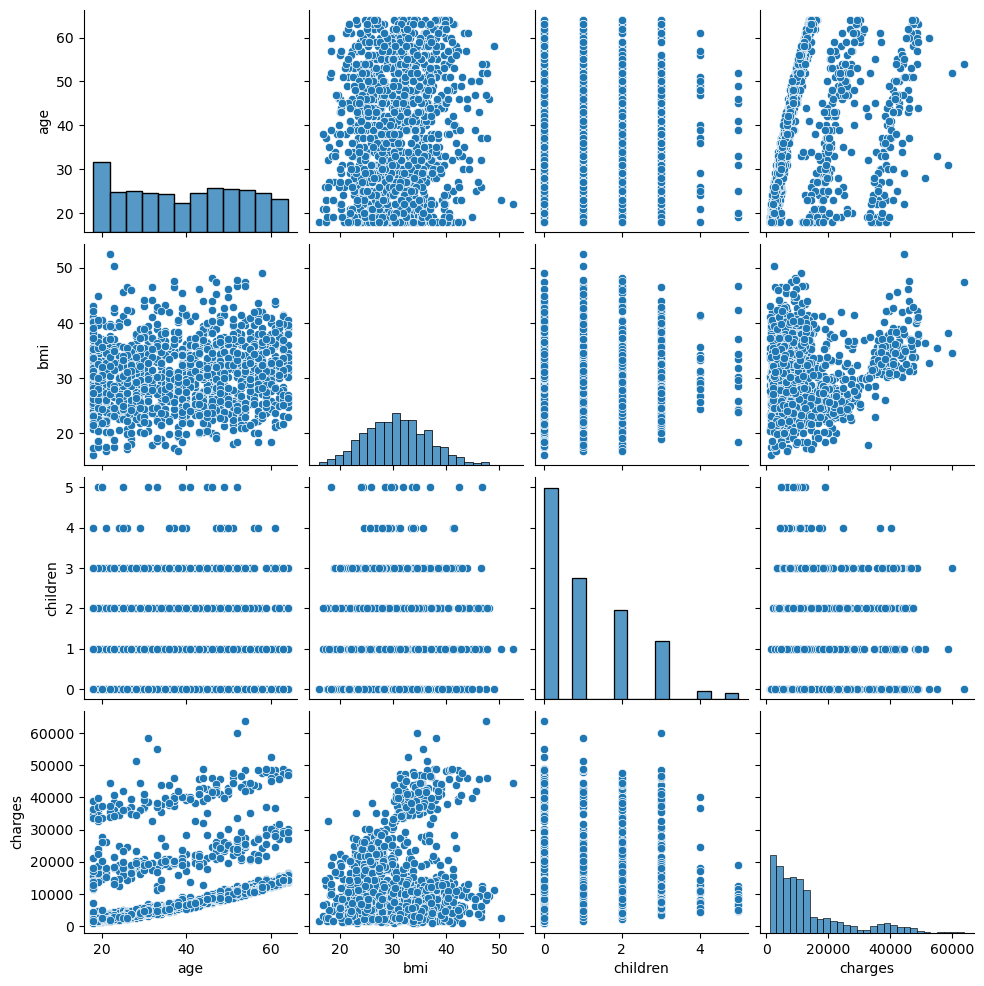

In [11]:
import seaborn as sns
sns.pairplot(df_data);

We can see the distribution of these numeric features.

* age: Age has an even distribution with a small rise at near 20.
* bmi: Bmi follows a normal distribution at around 30.
* children: Children follows a right skewed distribution with most people having 0 kids. 
* charges: Charges follows a right skewed distribution with most charges being less than 20,000

We can take a more in depth look into their distribution using boxplots 

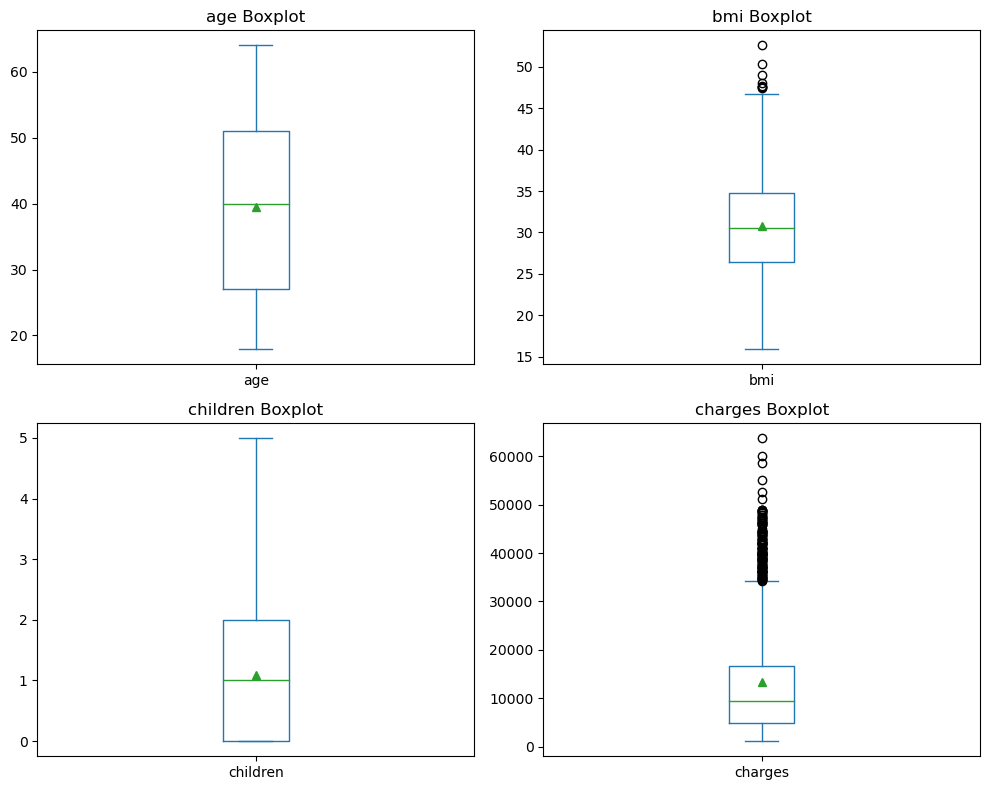

In [12]:
import matplotlib.pyplot as plt

features_to_plot = ['age', 'bmi', 'children', 'charges']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes.ravel()

for i, feature in enumerate(features_to_plot):
    ax[i].set_title(f'{feature} Boxplot')
    df_data[feature].plot(kind='box', ax=ax[i], showmeans=True)
    
plt.tight_layout();

Almost all of the features here are balanced other than charges. Charges has a higher mean than median because of it has many outliers. 

Some quick observations about the data:
* Median and mean age is 40
* Median and mean bmi is 30, with a few outliers after 46
* Median and mean children is 1
* Median charges amount is just below 10,000 with mean charges amount being 13,000. 
* Charges has many outliers after 35,000 while having a IQR of 5,000 to 16,000

This tells us most people are age 40, have a bmi of 30, have a single child and have a policy cost of around 10k.

I want to look into the sex feature more. When doing feature selection the models ranked sex as an unimportant feature.

In [13]:
# Getting frequency of female and males in dataset
df_data.groupby('sex').count()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,613,613,613,613,613,613
male,625,625,625,625,625,625


We have almost an equal amount of both female and males

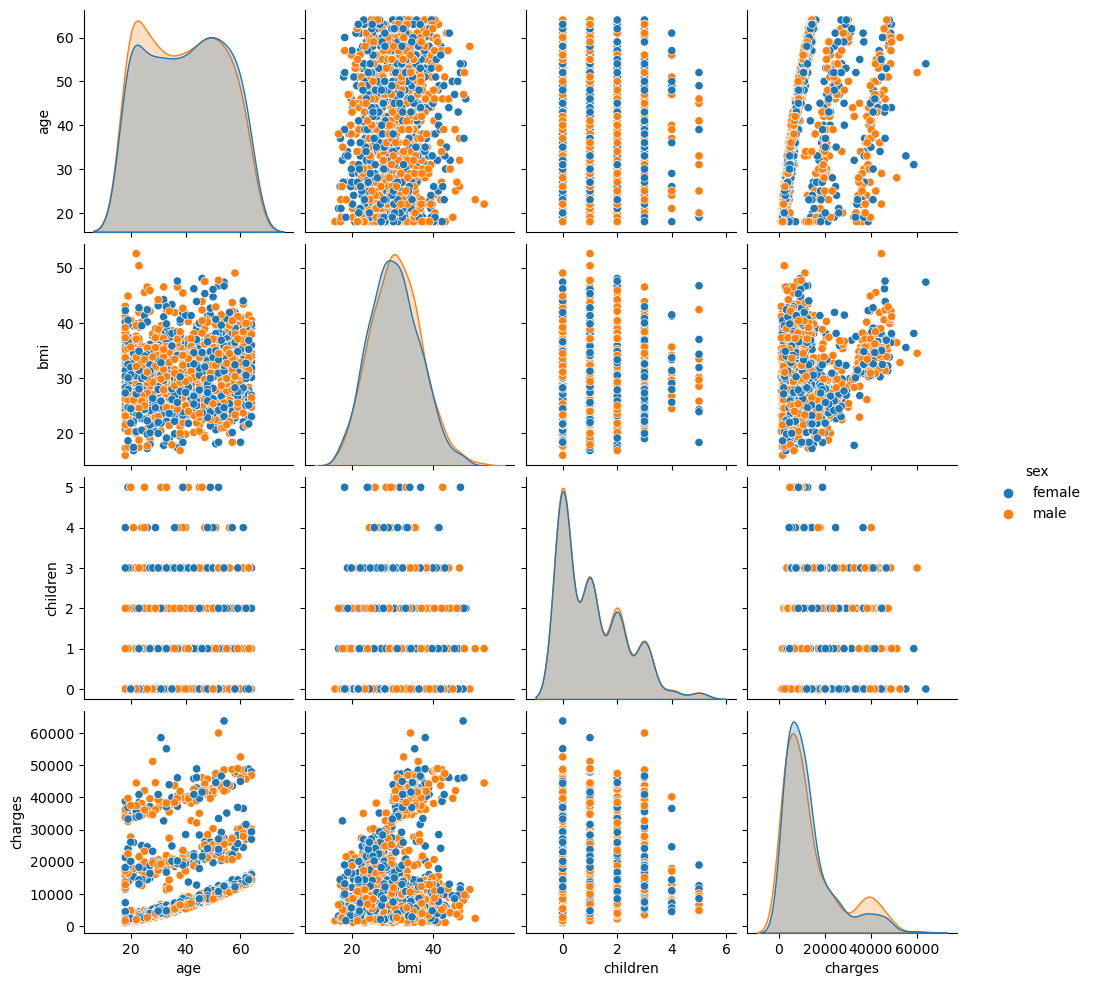

In [14]:
# pairplot classified by sex
sns.pairplot(df_data, hue='sex');

We can see that most of the distribution same between female and males. There is a small jump for males at around the 40k mark for chargers while females had more at 15k. With this small difference, both models still decided that sex was unimportant.

This tells us that there is little difference between female and males in terms of healthcare policy prices.

It will now be interesting to see how region affects all the other features.

In [15]:
# getting frequency of region in the dataset
df_data.groupby('region').count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,300,300,300,300,300,300
northwest,303,303,303,303,303,303
southeast,339,339,339,339,339,339
southwest,296,296,296,296,296,296


This feature is fairly balanced, with all being around 300 other than southeast at 340.

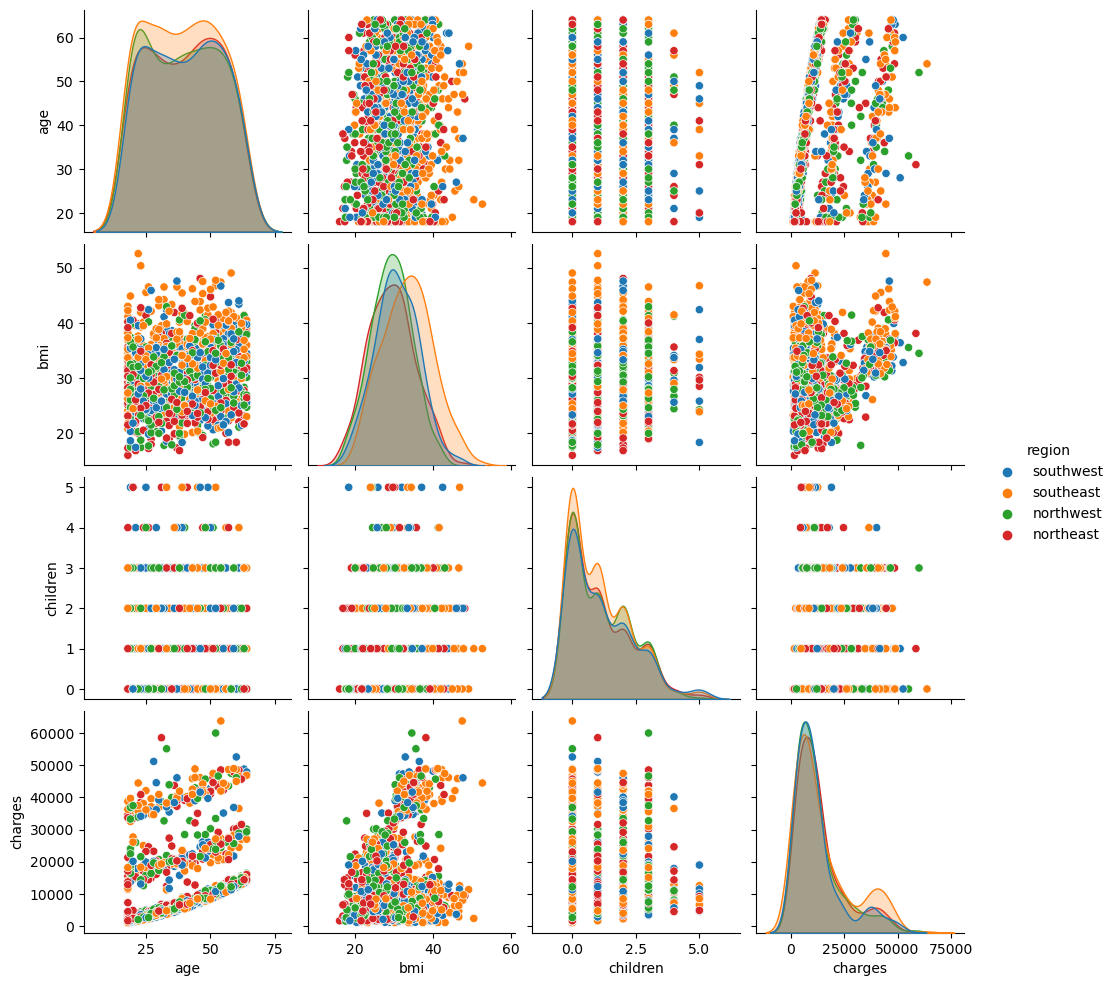

In [16]:
# pairplot classified by region
sns.pairplot(df_data, hue='region');

People living in the southeast have an average higher charge for their policy, while people living in the southwest and northwest have a lower average charge. Bmi could be a contributing factor for the cost here as people in the southeast have a higher bmi on average than those in other regions. Of course it could also do with the region itself being more unsafe or having health risks. location seems to have a small difference to the price.

Now it is time to take a look at how smoking affects all the other features.

In [17]:
# getting frequency of smoker in the dataset
df_data.groupby('smoker').count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,990,990,990,990,990,990
yes,248,248,248,248,248,248


Only 20% of people in our company smoke.

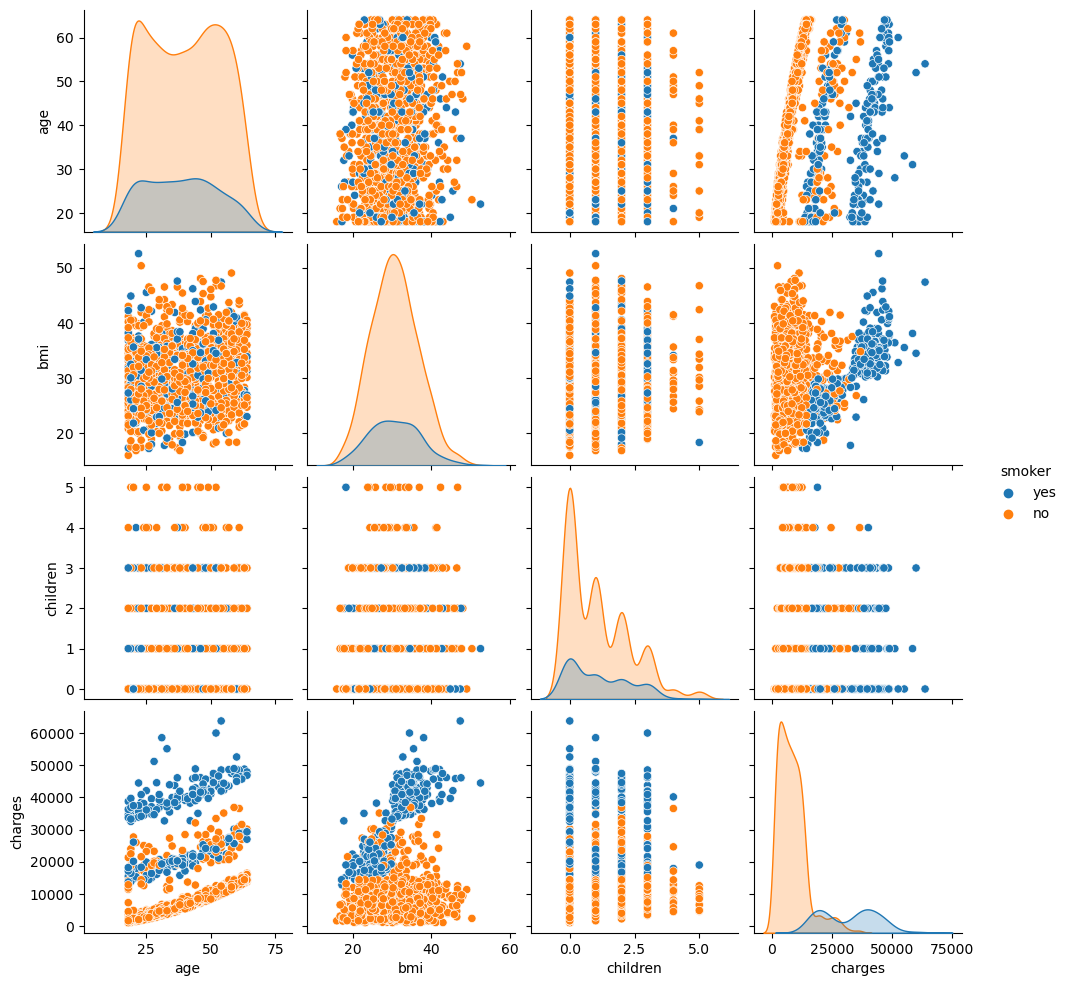

In [18]:
# pairplot classified by region
sns.pairplot(df_data, hue='smoker');

This is very interesting. The charge goes up significantly if the person is a smoker irrelevant of the other features. A boxplot of charges categorised by smoker will help showcase the difference.

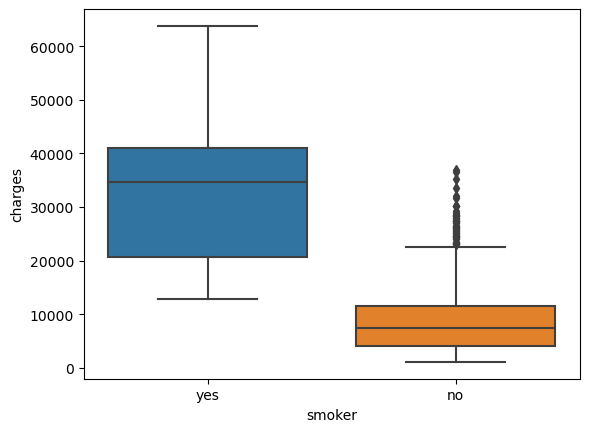

In [19]:
# Boxplot of smoker categorised by smoker
sns.boxplot(data=df_data, x='smoker', y='charges');

We can see a significant difference here in terms of charges if they are a smoker or not. The average non smoker is costing us around 8k while a smoker's policy is at 35k.
There are outliers for non smokers after 22k, but even the biggest outlier is still less than the smokers IQR. This shows us that being a smoker or not has to be the biggest defining factor in the healthcare policy.

Taking a look at the relationship between bmi and charges.

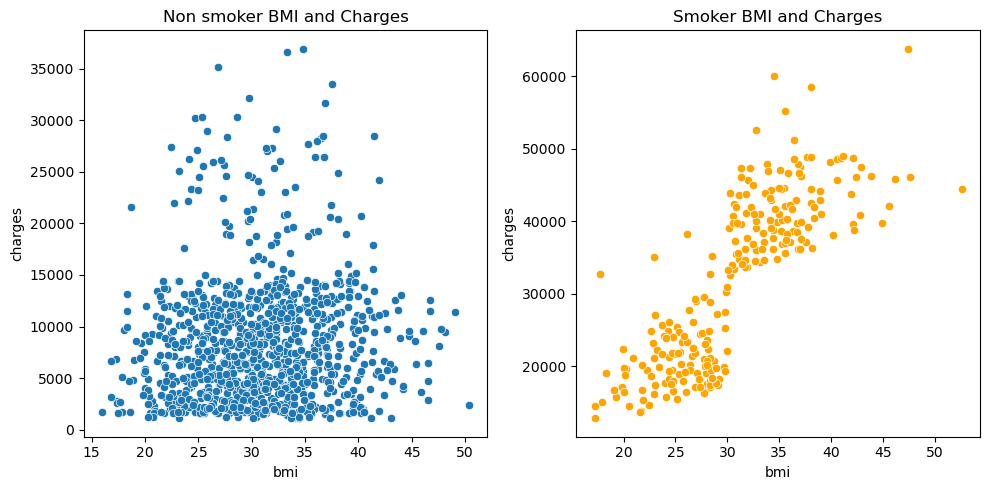

In [20]:
# Plotting scatter plot of bmi and charges

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

sns.scatterplot(data=df_data[df_data['smoker'] == 'no'], x='bmi', y='charges', ax=ax[0])
ax[0].set_title('Non smoker BMI and Charges')
sns.scatterplot(data=df_data[df_data['smoker'] == 'yes'], x='bmi', y='charges', ax=ax[1], c='orange')
ax[1].set_title('Smoker BMI and Charges')

plt.tight_layout();

A healthy BMI is considered to be in the range 18.5 to 24.9. [source](https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20overweight%20range.)

I wanted to make two scatterplots showcasing BMI and charges relationships separated by the smoker feature. This is because being a smoker has a significant change to the price so I thought it would be best to take a look at them individually.

As we can see from the non smoker BMI, it seems like there is not much of a difference between bmi and charges. From the min to the max bmi there is a clear cluster that is under 15k, with a smaller cluster above that. From just looking at it I can't tell a significant difference.

For a smoker though, there is a big price jump when we reach 30 bmi. Most smokers before 30 bmi have a price less than 30k, with almost all smokers above 30 bmi having a price between 35k and just below 50k. There are some outliers that are above 50k that go all the way to around 64k. Bmi definitely has a big impact on the price if the employee is a smoker. 

Taking a look at the relationship between age and charges.

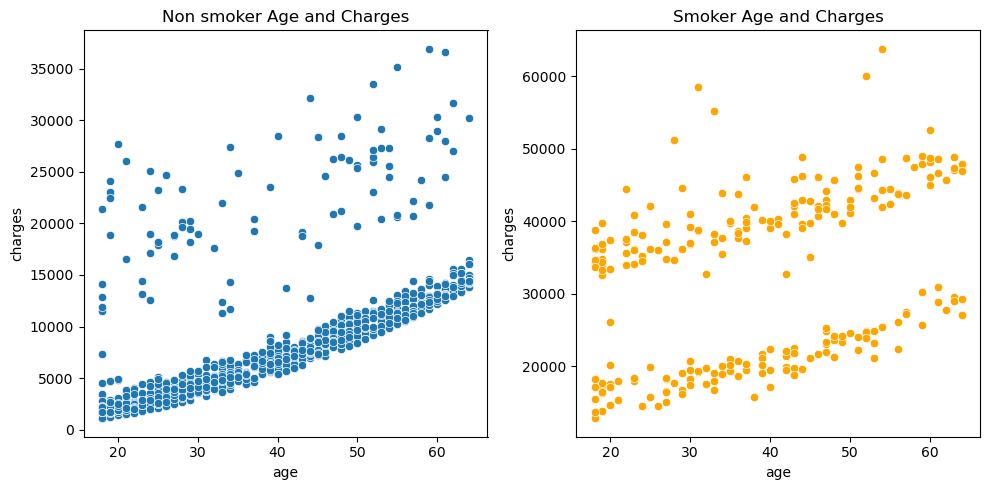

In [21]:
# Plotting scatter plot of Age and charges

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

sns.scatterplot(data=df_data[df_data['smoker'] == 'no'], x='age', y='charges', ax=ax[0])
ax[0].set_title('Non smoker Age and Charges')
sns.scatterplot(data=df_data[df_data['smoker'] == 'yes'], x='age', y='charges', ax=ax[1], c='orange')
ax[1].set_title('Smoker Age and Charges')

plt.tight_layout();

We can definitely see that when age rises in both plots, the price does too. For both plots there seems to be two distinct clusters, one with a higher charge and one with a lower charge. Nevertheless, both clusters are trending upwards in price as the age increases. This makes sense and has a significant influence on the cost of the policy.

now we will have a quick look at region.

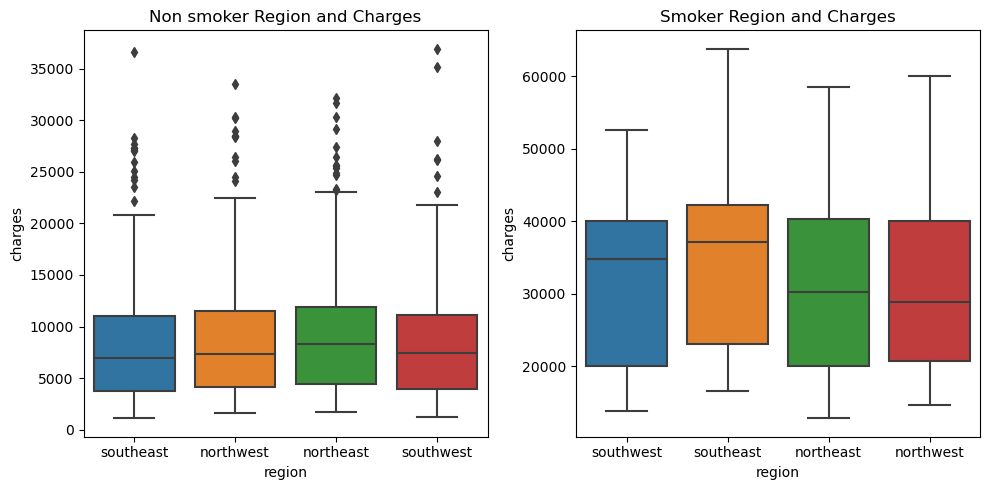

In [22]:
# Plotting scatter plot of Region and charges

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

sns.boxplot(data=df_data[df_data['smoker'] == 'no'], x='region', y='charges', ax=ax[0])
ax[0].set_title('Non smoker Region and Charges')
sns.boxplot(data=df_data[df_data['smoker'] == 'yes'], x='region', y='charges', ax=ax[1])
ax[1].set_title('Smoker Region and Charges')

plt.tight_layout();

As we can see here, there seems to be a small difference between regions if an employee is a non smoker. Northeast and northwest are the two regions leading non smokers by a small margin. 
For smokers, all of the regions are even other than southeast. Southeast stands out with having a higher price on average for smokers.

Region seems to have a small difference on the policy price. 

lastly we will take a look at the children feature.

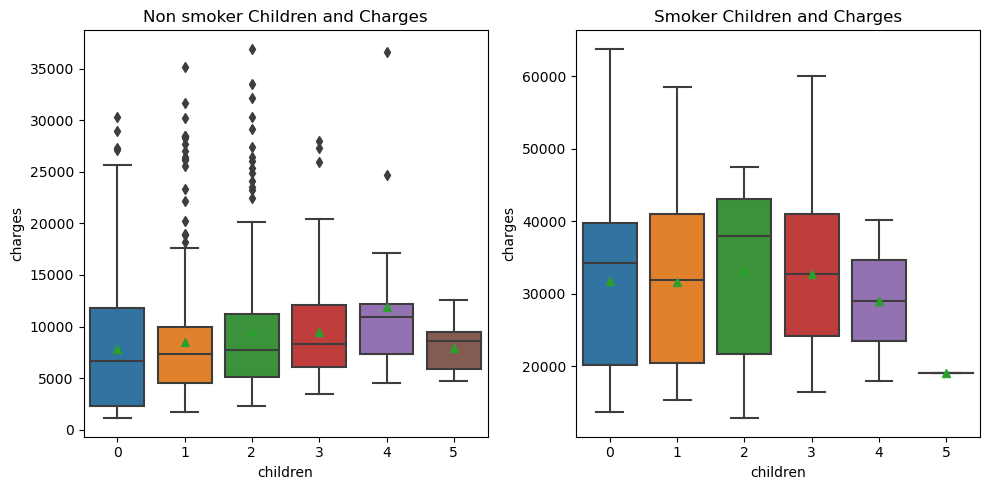

In [23]:
# Plotting scatter plot of children and charges

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

sns.boxplot(data=df_data[df_data['smoker'] == 'no'], x='children', y='charges', ax=ax[0], showmeans=True)
ax[0].set_title('Non smoker Children and Charges')
sns.boxplot(data=df_data[df_data['smoker'] == 'yes'], x='children', y='charges', ax=ax[1], showmeans=True)
ax[1].set_title('Smoker Children and Charges')

plt.tight_layout();

For non smokers there seems to be a small trend up in the mean for the total number of children, other than 5 which deeps below all the other. For smokers there seems to be a small trend up as well other than for 4 and 5 children total. 

In both cases the min max range for 0 children seems to be the highest.

children seems to have a small influence on the price.

#### Conclusion
***
From plotting the data and analysing it. This is what I have found out.
* Being a smoker is the biggest determining factor on the policies price
* The higher the age the more the price trends up
* For non smokers, it was hard to tell if an increase of bmi had any increase in price
* For smokers it was clear that having a bmi of over 30 increases the price significantly
* Both Region and Children seemed to have a marginal affect on the price

For my chosen models I will use LinearRegression and RandonForestRegressor models both from sklearn. We can change the data into second order and use our LinearRegression model to preform polynomial regression. 

I believe all models will preform well on this dataset

### Use the k-fold cross validation approach to find the optimal model that you can apply on the testing data provided. Report the loss and validation accuracy curve and show when and why you stopped e.g., did you reached convergence or not. [2.75 Marks]

To find the optimal model and it's parameters we will use kfold cross validation and evaluate the models using the root mean squared error. With the models I chosen it is not possible for me to find out if I reached convergence or not. I'll be using RMSE to evaluate my models as it is convienent and easy to interept.

First we will seperate the scaled training set into X and y training sets

In [24]:
# Splitting scaled training data into X and y training data
X_train = df_data_scaled.drop('charges', axis=1)
y_train = df_data_scaled['charges']

In assignment 2 I used GridSearchCV from sklearn which gave me good results when asked to use k-fold cross validation. GirdSearchCV uses kfold cross validation which takes in the training data, the model and the paramters we want to hyper tune. Not only does it fit and score the model using k-fold cross validation, but we can also input parameters to hyper tune the model. It will give us the paramters from the model which scored the best along with the scoring evaluation we choose.

I plan to use this for LinearRegression, then LinearRegression with second order data and then finally RandomForestRegressor.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

params = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(LinearRegression(), params, cv=5, scoring='neg_root_mean_squared_error')

grid_search.fit(X_train, y_train)

print(f"best params: {grid_search.best_params_}")
print(f"best score: {-grid_search.best_score_}")

best params: {'fit_intercept': True, 'positive': False}
best score: 6060.38402242604


These are the default parameters for Linear Regression. This Linear Regression model has a root mean squared error of 6060. This feels like quite a high RMSE to have. It means on average our model is off by 6060 euros per an employees policy.

We can use PolynomialFeatures from sklearn to transform our data into second order. We will then apply the same LinearRegression model using k-fold cross validation with GridSearchCV.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

# Using 2 for second order
poly = PolynomialFeatures(2)

X_train_second_order = poly.fit_transform(X_train)

In [27]:
# Using GridSearchCV and LinearRegression

params = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(LinearRegression(), params, cv=5, scoring='neg_root_mean_squared_error')

grid_search.fit(X_train_second_order, y_train)

print(f"best params: {grid_search.best_params_}")
print(f"best score: {-grid_search.best_score_}")

best params: {'fit_intercept': True, 'positive': False}
best score: 4820.1478343955505


The default parameters were chosen for the model again. Using polynomial regression in the second order has given us a better RMSE than linear regression at 4820. This is an improvement of 1240 over linear regression.

lets give third order polynomial regression a go and see if it improves even more.

In [28]:
# Using 3 for third order
poly = PolynomialFeatures(3)

X_train_third_order = poly.fit_transform(X_train)

In [29]:
# Using GridSearchCV and LinearRegression

params = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(LinearRegression(), params, cv=5, scoring='neg_root_mean_squared_error')

grid_search.fit(X_train_third_order, y_train)

print(f"best params: {grid_search.best_params_}")
print(f"best score: {-grid_search.best_score_}")

best params: {'fit_intercept': True, 'positive': False}
best score: 4828.82568929545


We have scored worse using third order than we did for second order. This must mean that a quadratic line is more suited to the dataset than a linear or cubic line.

Now lets use the RandomForestRegressor and see if it can out perform polynomial regression.

In [30]:
from sklearn.ensemble import RandomForestRegressor

params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [4, 8, 12],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(RandomForestRegressor(), params, cv=5, scoring='neg_root_mean_squared_error')

grid_search.fit(X_train, y_train)

print(f"best params: {grid_search.best_params_}")
print(f"best score: {-grid_search.best_score_}")

best params: {'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 2, 'n_estimators': 100}
best score: 4559.07218077


Hypertuning and using k-fold cross validation, we have trained a regression model that is giving us 4558 RMSE. RandomForestRegressor is the best model we have trained so far and outperforms polynomial regression at second order by about 270. The RandomForestRegressor we trained has an average error of 4558 when validated with k-fold cross validation. I believe this is an acceptable amount of RMSE and we have drastically lowered the RMSE score from linear regression by about 1500.

We will use this RandomForestRegressor with chosen best parameters and find out what the price should be for the new 100 employees.

### Report the final total price that you got. [0.25 Marks]

The total price for the new employees is 17755825 - 16410282.7 = 1345542.3

We will train and fit our model on the training data then get the cumulative prediction of the testing data to see much we should be paying.

In [31]:
# Fitting RandomForestRegressor
rfr = RandomForestRegressor(min_samples_leaf=12, min_samples_split=2)
rfr.fit(X_train, y_train)

# Getting predictions and getting total sum

predictions_total = rfr.predict(df_test_data_scaled).sum()

predictions_total

1263796.8996149155

our model predicted that we should be paying 1,263,797 instead of 1,345,542. This is a difference of 81,745. This is a significant difference and I think we should have a conversation with our healthcare provider to see if we can negoiate a better price for us